# COVID TEXAS Project

In [11]:
#Packages
import pandas as pd
import json
import urllib3
import urllib
import requests
import ssl
import streamlit as st
import seaborn as sns

ssl._create_default_https_context = ssl._create_unverified_context

## Load Dataset

In [32]:
#load data


# # open the url and the screen name 
# # (The screen name is the screen name of the user for whom to return results for)
# url = "https://api.covidtracking.com/v1/states/ca/current.json"

# # this takes a python object and dumps it to a string which is a JSON
# # representation of that object
# data = json.load(urllib3.urlopen(url))

# # print the result
# print(data)

#Current data for Texas
data_current = pd.read_csv('https://api.covidtracking.com/v1/states/tx/current.csv')
#Current Historical Data for Texas
data_daily = pd.read_csv('https://api.covidtracking.com/v1/states/tx/daily.csv')
#Current Cases by county
data_county = pd.read_excel('https://dshs.texas.gov/coronavirus/TexasCOVID19DailyCountyCaseCountData.xlsx', skiprows=2,delimiter='\r')
#Current Racial data
data_racial = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR_xmYt4ACPDZCDJcY12kCiMiH0ODyx3E1ZvgOHB8ae1tRcjXbs_yWBOA4j4uoCEADVfC1PS2jYO68B/pub?gid=43720681&single=true&output=csv')


In [54]:
#Racial dataset for cases
data_racialTX = data_racial.loc[data_racial['State'] == 'TX' ]
data_racialTX['Datetime'] = data_racialTX['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data_racialTX = data_racialTX.filter(['Datetime', 'State', 'Cases_White', 'Cases_Black', 'Cases_LatinX', 'Cases_Asian', 'Deaths_White','Deaths_Black','Deaths_LatinX','Deaths_Asian'])
data_racialTX.head()

,Datetime,State,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Deaths_White,Deaths_Black,Deaths_LatinX,Deaths_Asian
47,2020-09-20,TX,15399,8587.0,20728.0,789.0,4489.0,1691.0,8342.0,282.0
103,2020-09-16,TX,14872,8297.0,20251.0,778.0,4373.0,1643.0,8096.0,279.0
159,2020-09-13,TX,14529,8143.0,19961.0,771.0,4281.0,1620.0,7929.0,275.0
215,2020-09-09,TX,14081,7903.0,19548.0,757.0,4134.0,1561.0,7646.0,267.0
271,2020-09-06,TX,13977,7839.0,19423.0,757.0,4069.0,1539.0,7519.0,264.0


In [53]:
data_racialTX.columns

Index(['Datetime', 'State', 'Cases_White', 'Cases_Black', 'Cases_LatinX',
       'Cases_Asian', 'Deaths_White', 'Deaths_Black', 'Deaths_LatinX',
       'Deaths_Asian'],
      dtype='object')

In [52]:
#Data for a daily for Texas.
data_daily['datetime'] = data_daily['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data_tx = data_daily.filter(['datetime', 'state', 'positive', 'hospitalizedCurrently', 'death', 'recovered'])
data_tx.head()

,datetime,state,positive,hospitalizedCurrently,death,recovered
0,2020-09-22,TX,716207,3207.0,14994.0,613896.0
1,2020-09-21,TX,698387,3132.0,14917.0,611856.0
2,2020-09-20,TX,688534,3081.0,14893.0,609210.0
3,2020-09-19,TX,686068,3124.0,14848.0,605522.0
4,2020-09-18,TX,682241,3172.0,14713.0,600662.0


In [100]:
#Rows and Columns
data_daily.shape

(197, 54)

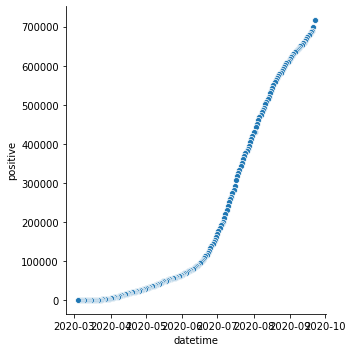

In [45]:
sns.relplot(data=data_tx, x='datetime', y='positive')

In [95]:
data_tx.DateTime

0     2020-09-16
1     2020-09-15
2     2020-09-14
3     2020-09-13
4     2020-09-12
         ...    
192   2020-03-08
193   2020-03-07
194   2020-03-06
195   2020-03-05
196   2020-03-04
Name: DateTime, Length: 197, dtype: datetime64[ns]